<h3>Importing Libs</h3>

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Loading Data </h3>

In [7]:
dataset_path = os.path.join('loan', 'loan.csv')
df = pd.read_csv(dataset_path)
df.head()

C:\Users\rezon760779\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<h3>Dataset size</h3>

In [8]:
df.shape

(39717, 111)

<h3> Checking Null Values Count On Each Columns</h3>

In [9]:
null_counts = df.isnull().sum()
null_counts

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

<h3>Removing All Columns which are completly Null</h3>

In [10]:
df = df.dropna(axis=1, how='all')
df.shape

(39717, 57)

<font color='red'>Out of 111 Columns, 54 Columns contains only null value</font><br>
<font color='red'>Removed 54 Columns Now we have 57 Columns left to Analysis</font>

<h4>Now Analysing Null Value Count of Remaning Columns</h4>

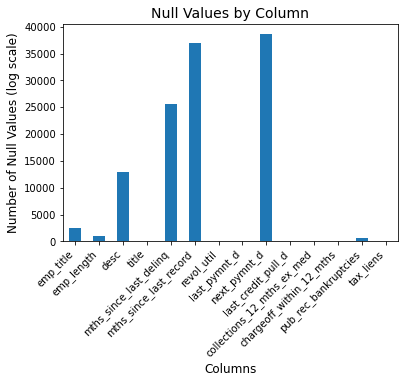

<Figure size 864x576 with 0 Axes>

In [11]:
# Count the null values in each column
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
# Create a bar plot
null_counts.plot(kind='bar')

# Customize the plot
plt.title('Null Values by Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Null Values (log scale)', fontsize=12)  # Update the y-label text
plt.xticks(rotation=45, ha='right', fontsize=10)

# Increase the size of the plot window
plt.figure(figsize=(12, 8))

# Display the plot
plt.tight_layout()
plt.show()

<h3>Removing below Columns as it not possible to fix Missing Values</h3>
    <br>
<b><font color="Blue">mths_since_last_delinq</font>&nbsp;</b> {The number of months since the borrower's last delinquency.} <br>
<b><font color="Blue">mths_since_last_record</font>&nbsp;</b> {The number of months since the last public record.}<br>
<b><font color="Blue">next_pymnt_d</font>&nbsp;</b>	{Next scheduled payment date}<br>

Also Removing <b><font color="Blue">desc</font>&nbsp;</b> as it can't be standardised<br>
<b><font color="Blue">desc</font>&nbsp;</b>	{Loan description provided by the borrower}<br>

In [12]:
columns_to_drop = ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'desc']
df = df.drop(columns=columns_to_drop)
df.shape



(39717, 53)

In [13]:
Final_columns = ['addr_state',
'annual_inc',
'collection_recovery_fee',
'delinq_2yrs',
'dti',
'earliest_cr_line',
'emp_length',
'funded_amnt',
'funded_amnt_inv',
'grade',
'home_ownership',
'initial_list_status',
'inq_last_6mths',
'installment',
'int_rate',
'issue_d',
'last_credit_pull_d',
'last_pymnt_amnt',
'last_pymnt_d',
'loan_amnt',
'loan_status',
'open_acc',
'out_prncp',
'out_prncp_inv',
'pub_rec',
'pub_rec_bankruptcies',
'purpose',
'recoveries',
'revol_bal',
'revol_util',
'sub_grade',
'term',
'total_acc',
'total_pymnt',
'total_pymnt_inv',
'total_rec_int',
'total_rec_late_fee',
'total_rec_prncp',
'verification_status']
df = df[Final_columns]
df.shape

(39717, 39)

<h6><font color='red'>Removed 4 columns now we left with 53 Columns</font></h6>

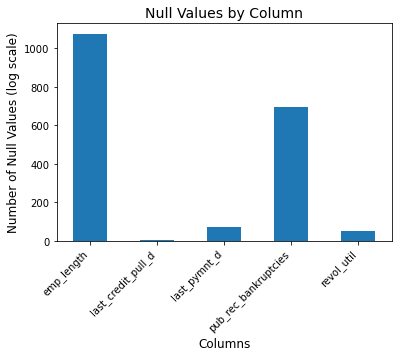

<Figure size 864x576 with 0 Axes>

In [14]:
# Count the null values in each column
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
# Create a bar plot
null_counts.plot(kind='bar')

# Customize the plot
plt.title('Null Values by Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Null Values (log scale)', fontsize=12)  # Update the y-label text
plt.xticks(rotation=45, ha='right', fontsize=10)

# Increase the size of the plot window
plt.figure(figsize=(12, 8))

# Display the plot
plt.tight_layout()
plt.show()

In [15]:
df.columns

Index(['addr_state', 'annual_inc', 'collection_recovery_fee', 'delinq_2yrs',
       'dti', 'earliest_cr_line', 'emp_length', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'home_ownership', 'initial_list_status',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d',
       'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt',
       'loan_status', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'recoveries', 'revol_bal',
       'revol_util', 'sub_grade', 'term', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee',
       'total_rec_prncp', 'verification_status'],
      dtype='object')

In [16]:
#Check Missing Values in Rows
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
39712    1
39713    1
39714    1
39715    1
39716    1
Length: 39717, dtype: int64

In [17]:
set(df['emp_length'])

{'1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 nan}

In [18]:
#In emp_length there are nan values present, filling 'nan' with 0
df['emp_length'] = df['emp_length'].fillna(0)
set(df['emp_length'])

{0,
 '1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year'}

In [19]:
set(df['home_ownership'])

{'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'}

In [20]:
#Remove Records which have None
df = df[df['home_ownership']!='NONE']
set(df['home_ownership'])

{'MORTGAGE', 'OTHER', 'OWN', 'RENT'}

In [21]:
df.shape


(39714, 39)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39714 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   addr_state               39714 non-null  object 
 1   annual_inc               39714 non-null  float64
 2   collection_recovery_fee  39714 non-null  float64
 3   delinq_2yrs              39714 non-null  int64  
 4   dti                      39714 non-null  float64
 5   earliest_cr_line         39714 non-null  object 
 6   emp_length               39714 non-null  object 
 7   funded_amnt              39714 non-null  int64  
 8   funded_amnt_inv          39714 non-null  float64
 9   grade                    39714 non-null  object 
 10  home_ownership           39714 non-null  object 
 11  initial_list_status      39714 non-null  object 
 12  inq_last_6mths           39714 non-null  int64  
 13  installment              39714 non-null  float64
 14  int_rate              

In [23]:
df= df[~df['revol_util'].isnull()]

In [24]:
df['revol_util'].isnull().count()

39664

In [25]:
df['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [26]:
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [27]:
df['revol_util'].head()

0    83.70
1     9.40
2    98.50
3       21
4    53.90
Name: revol_util, dtype: object

In [28]:
def revol_util_categgories_func(x):
    x = float(x)
    if x <= 5:
        return "Extremely Good"
    elif (x > 5) & (x <= 30):
        return "Good"
    elif (x > 30) & (x <= 50):
        return "Moderate"
    elif (x > 50) & (x <= 70):
        return "Risky"
    elif x > 70:
        return "Extremely Risky"

In [29]:
df['revol_util_categories'] = df['revol_util'].apply(lambda x: revol_util_categgories_func(x))

In [30]:
df.groupby('revol_util_categories').count()

,addr_state,annual_inc,collection_recovery_fee,delinq_2yrs,dti,earliest_cr_line,emp_length,funded_amnt,funded_amnt_inv,grade,...,revol_util,sub_grade,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,verification_status
revol_util_categories,,,,,,,,,,,,,,,,,,,,,
Extremely Good,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,...,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733
Extremely Risky,10891,10891,10891,10891,10891,10891,10891,10891,10891,10891,...,10891,10891,10891,10891,10891,10891,10891,10891,10891,10891
Good,8986,8986,8986,8986,8986,8986,8986,8986,8986,8986,...,8986,8986,8986,8986,8986,8986,8986,8986,8986,8986
Moderate,8464,8464,8464,8464,8464,8464,8464,8464,8464,8464,...,8464,8464,8464,8464,8464,8464,8464,8464,8464,8464
Risky,8590,8590,8590,8590,8590,8590,8590,8590,8590,8590,...,8590,8590,8590,8590,8590,8590,8590,8590,8590,8590


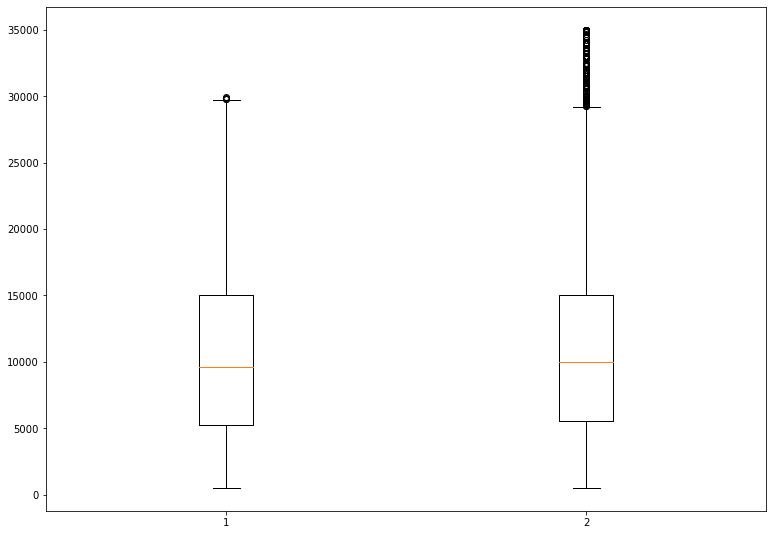

Number of outliers  (828, 40)


In [31]:
loan_amount_data = [df[df['loan_amnt'] < 30000].loan_amnt, df['loan_amnt']]
loan_amount_fig = plt.figure(figsize =(10, 7))
ax = loan_amount_fig.add_axes([0,0,1,1])
ax.boxplot(loan_amount_data)
plt.show()
print("Number of outliers ",df[df['loan_amnt'] > 30000].shape)

It is evident that the loan amount is ranged between <b>5000 and 15000</b> i.e the 1st quartile and the 3rd quartile respectively with an inter quartile range of <b>10000</b> and the maximum amount is closer to <b>30000</b> and the minimum loan amount is closer to <b>1000</b>. The box plot confirms that outliers are present for loan amount above <b>30000</b> that are <b>828 rows/loan accounts</b>.

In [32]:
print(df.shape)
df = df.drop(df[df['loan_amnt'] >= 30000].index)
print(df.shape)

(39664, 40)
(38459, 40)


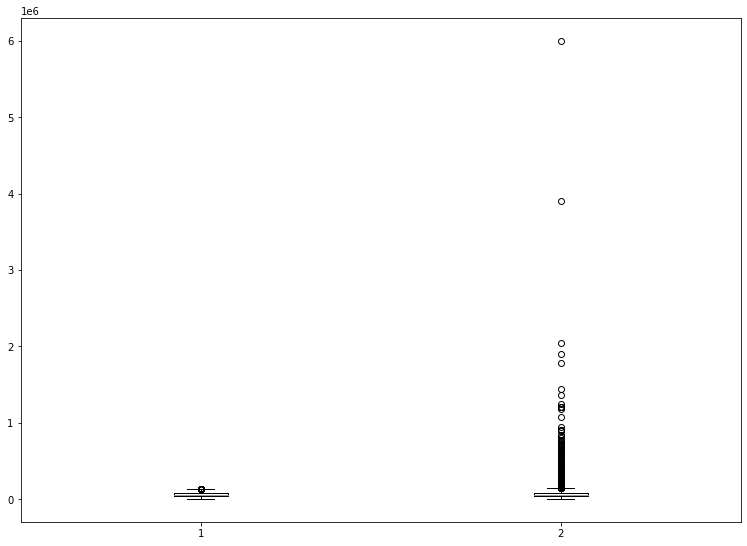

In [36]:
annual_income_data = [df[df['annual_inc'] < 130000].annual_inc, df['annual_inc']]
annual_income_fig = plt.figure(figsize =(10, 7))
ax = annual_income_fig.add_axes([0,0,1,1])
ax.boxplot(annual_income_data)
plt.show()

In [37]:
df = df.drop(df[df['annual_inc'] >= 130000].index)
print(df.shape)

(36098, 40)


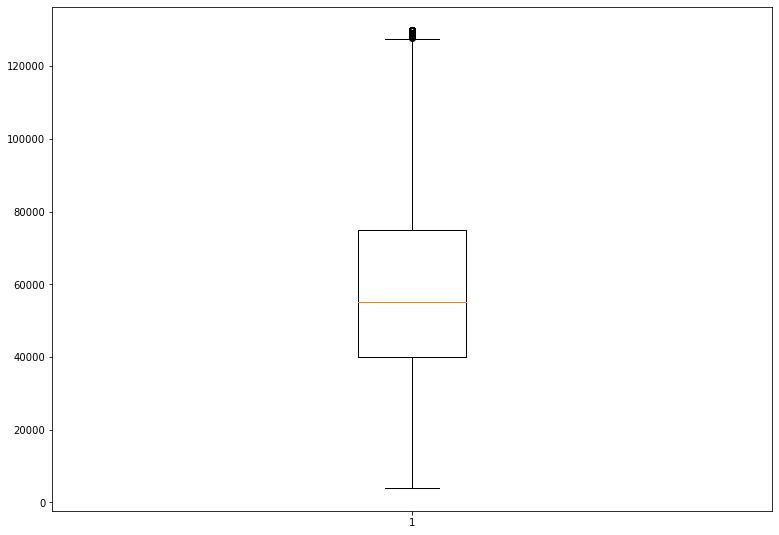

In [38]:
annual_income_data = df['annual_inc']
annual_income_fig = plt.figure(figsize =(10, 7))
ax = annual_income_fig.add_axes([0,0,1,1])
ax.boxplot(annual_income_data)
plt.show()

In [42]:
df['int_rate'] = pd.to_numeric(df['int_rate'].str.rstrip("%"))

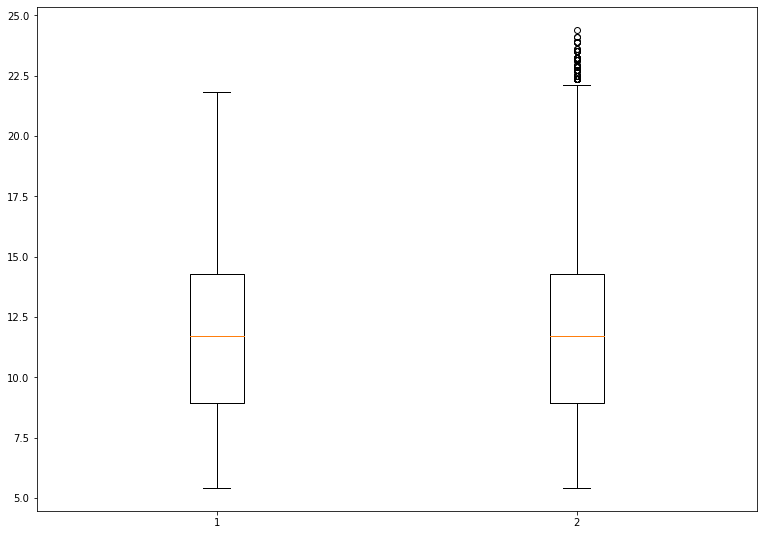

In [43]:
annual_income_data = [df[df['int_rate'] < 22 ].int_rate, df['int_rate']]
annual_income_fig = plt.figure(figsize =(10, 7))
ax = annual_income_fig.add_axes([0,0,1,1])
ax.boxplot(annual_income_data)
plt.show()

In [44]:
df = df.drop(df[df['int_rate'] > 22 ].index)
print(df.shape)

(108, 40)


In [52]:
int_rate_bins = [0, 5, 10, 12.5, 15, 22]
int_rate_labels = ['0-5', '5-10', '10-12.5', '12.5-15', '15+']
df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce')
# Creating a new column 'int_rate_catgs' based on the categorized interest rates
df['int_rate_catgs'] = pd.cut(df['int_rate'], bins=int_rate_bins, labels=int_rate_labels)

In [ ]:
df['int_rate_catgs'].head()

In [32]:
def normalise_loan_amnt(loan_amount):
    if loan_amount >= 500 and loan_amount < 5500:
        return "Low"
    elif loan_amount >= 5500 and loan_amount < 10000:
        return "Medium"
    elif loan_amount >= 10000 and loan_amount < 15000:
        return "High"
    elif loan_amount >= 15000:
        return "Very High"

<h2>Bivariate Analysis</h2>

In [35]:
# Purpose of Loan against Chargedoff_Proportion.

# Grouping the data by 'purpose' and 'loan_status' to analyze the loan status distribution
purpose_vs_loan = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,475.0,74.0,1278.0,1827.0,0.259989
10,renewable_energy,19.0,1.0,83.0,103.0,0.184466
3,educational,56.0,0.0,266.0,322.0,0.173913
8,moving,92.0,7.0,482.0,581.0,0.158348
9,other,629.0,128.0,3221.0,3978.0,0.158120
5,house,59.0,14.0,308.0,381.0,0.154856
7,medical,105.0,12.0,574.0,691.0,0.151954
2,debt_consolidation,2762.0,586.0,15280.0,18628.0,0.148271
12,vacation,53.0,6.0,321.0,380.0,0.139474
4,home_improvement,344.0,101.0,2526.0,2971.0,0.115786


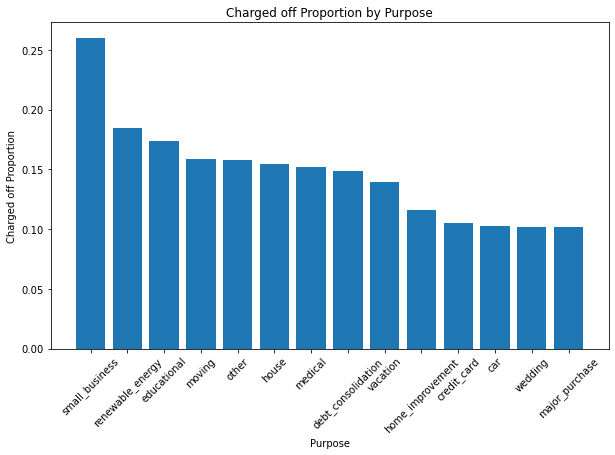

In [37]:
# Plotting the graph
# Sorting the dataframe by the proportion of charged off cases in descending order
purpose_vs_loan_sorted = purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(purpose_vs_loan_sorted['purpose'], purpose_vs_loan_sorted['Chargedoff_Proportion'])
plt.xlabel('Purpose')
plt.ylabel('Charged off Proportion')
plt.title('Charged off Proportion by Purpose')
plt.xticks(rotation=45)
plt.show()

<font color="Blue"><h4>Upon careful examination, it was observed that small business applicants face a significant risk of being charged off.</h4></font>
<font color="Blue"><h4>When analyzing the data, it becomes evident that the proportion of charged off cases is comparatively higher in the renewable energy category than in other categories.</h4>
</font>

In [41]:
#Conducting a bivariate analysis on the variable 'grade' in relation to the proportion of charged off cases.

grade_vs_loan = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan_sorted = grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)
grade_vs_loan_sorted

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,99,17,198,314,0.315287
5,F,316,73,654,1043,0.302972
4,E,711,179,1941,2831,0.251148
3,D,1115,222,3954,5291,0.210735
2,C,1343,264,6477,8084,0.166131
1,B,1425,345,10247,12017,0.118582
0,A,602,40,9442,10084,0.059699


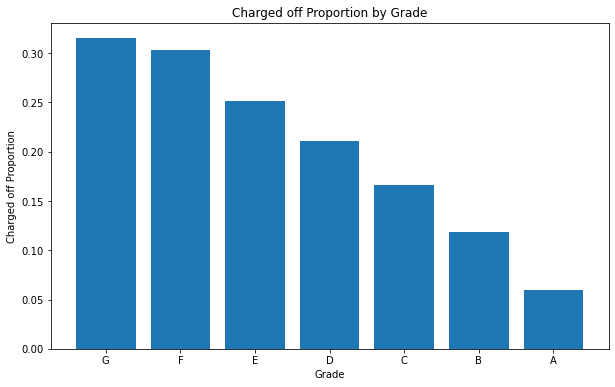

In [42]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(grade_vs_loan_sorted['grade'], grade_vs_loan_sorted['Chargedoff_Proportion'])
plt.xlabel('Grade')
plt.ylabel('Charged off Proportion')
plt.title('Charged off Proportion by Grade')
plt.show()

<h3>The analysis reveals the following observations: </h3><br>
<li>Grade 'A' shows a significantly low likelihood of being charged off.
<li>Grades 'F' and 'G' exhibit a considerably high likelihood of being charged off.
<li>The likelihood of charged off cases increases progressively from grade 'A' to grade 'G'.

In [43]:
#Conducting a bivariate analysis on the variable 'sub_grade' in relation to the proportion of charged off cases.

subgrade_vs_loan = df.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
subgrade_vs_loan['Total'] = subgrade_vs_loan['Charged Off'] + subgrade_vs_loan['Current'] + subgrade_vs_loan['Fully Paid']
subgrade_vs_loan['Chargedoff_Proportion'] = subgrade_vs_loan['Charged Off'] / subgrade_vs_loan['Total']
subgrade_vs_loan_sorted = subgrade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

In [44]:
subgrade_vs_loan_sorted

loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,54.0,5.0,59.0,118.0,0.457627
32,G3,19.0,3.0,26.0,48.0,0.395833
31,G2,27.0,1.0,49.0,77.0,0.350649
34,G5,10.0,1.0,19.0,30.0,0.333333
28,F4,52.0,17.0,96.0,165.0,0.315152
30,G1,30.0,10.0,63.0,103.0,0.291262
23,E4,126.0,30.0,298.0,454.0,0.277533
25,F1,91.0,24.0,213.0,328.0,0.277439
27,F3,51.0,11.0,123.0,185.0,0.275676
26,F2,68.0,16.0,163.0,247.0,0.275304


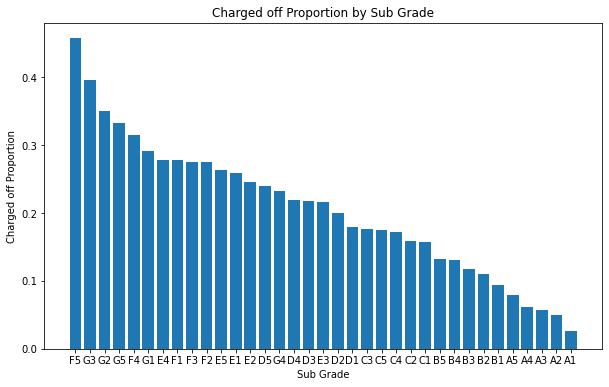

In [46]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(subgrade_vs_loan_sorted['sub_grade'], subgrade_vs_loan_sorted['Chargedoff_Proportion'])
plt.xlabel('Sub Grade')
plt.ylabel('Charged off Proportion')
plt.title('Charged off Proportion by Sub Grade')
plt.show()

<h3>The analysis reveals the following observations: </h3><br>
<li>"A" sub grades exhibit a significantly lower likelihood of being charged off.
<li>"F" and "G" sub grades have a considerably higher likelihood of being charged off.
<li>The proportion of charged off cases increases progressively as we move from "A" sub grades towards "G" sub grades.